# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3


In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [7]:
# Fetch current BTC price
# YOUR CODE HERE!
import requests
response_btc = requests.get(btc_url)
btc_symbol = 'BTC'
data_btc= response_btc.json()
btc_price = data_btc['data']['1']['quotes']['USD']['price']
crypto_prices = {}

# Fetch current ETH price
# YOUR CODE HERE!
response_eth = requests.get(eth_url)
eth_symbol = 'ETH'
data_eth = response_eth.json()
eth_price = data_eth['data']['1027']['quotes']['USD']['price']
crypto_prices['ETH'] = eth_price

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $31494.00
The current value of your 5.3 ETH is $8409.83


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
api_key = 'PK2BZI9OWVAF62058QD2'
secret_key = 'brLZNeoXr6T38ICbd4zGsyUaVLQtx2lzFi8iWwlM'
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(api_key, secret_key, base_url="https://paper-api.alpaca.markets") 

In [10]:
# Format current date as ISO format
# YOUR CODE HERE!
import alpaca_trade_api as tradeapi
import pandas as pd
from datetime import datetime

current_date_iso =  pd.Timestamp("2023-09-22", tz="America/New_York").isoformat()
#end_date = pd.Timestamp("2023-09-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
closing_prices = api.get_bars(
    tickers,
    timeframe,
    start=current_date_iso,
     end=current_date_iso,
    
).df
#closing_prices

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!

agg = closing_prices[closing_prices["symbol"]=="AGG"].drop("symbol", axis=1)
spy = closing_prices[closing_prices["symbol"]=="SPY"].drop("symbol", axis=1)



# Concatenate the ticker DataFrames
# YOUR CODE HERE!
closing_prices = pd.concat([agg,spy], axis=1, keys=["AGG","SPY"])

# Preview DataFrame
# YOUR CODE HERE!
closing_prices

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2023-09-22 04:00:00+00:00  94.78  95.09  94.73  95.05  7294228       21212   

                                        SPY                                    \
                               vwap    open   high     low   close     volume   
timestamp                                                                       
2023-09-22 04:00:00+00:00  95.01306  432.45  434.1  429.99  430.42  100829684   

                                                   
                          trade_count        vwap  
timestamp                                          
2023-09-22 04:00:00+00:00      637168  431.737394

In [11]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = agg["close"][0]
spy_close_price = spy["close"][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.05
Current SPY closing price: $430.42


In [12]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21521.00
The current value of your 200 AGG shares is $19010.00


### Savings Health Analysis

In [13]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 5000 
# Consolidate financial assets data
# YOUR CODE HERE!
financial_assets_data = {
    'Asset Type': ['Savings Account', 'Stocks (SPY)', 'Bonds (AGG)'],
    'Asset Value': [250, my_spy_value, my_agg_value]  
}

# Create savings DataFrame
# YOUR CODE HERE!
# Create a DataFrame from the financial assets data
df_financial_assets = pd.DataFrame(financial_assets_data)

# Calculate the total assets value
total_assets_value = df_financial_assets['Asset Value'].sum()

savings_data = {
    'Category': ['Monthly Income', 'Total Assets', 'Savings'],
    'Value': [monthly_income, total_assets_value, (monthly_income + total_assets_value)]
}
df_savings = pd.DataFrame(savings_data)
# Display savings DataFrame
display(df_savings)

,Category,Value
0,Monthly Income,5000.0
1,Total Assets,40781.0
2,Savings,45781.0


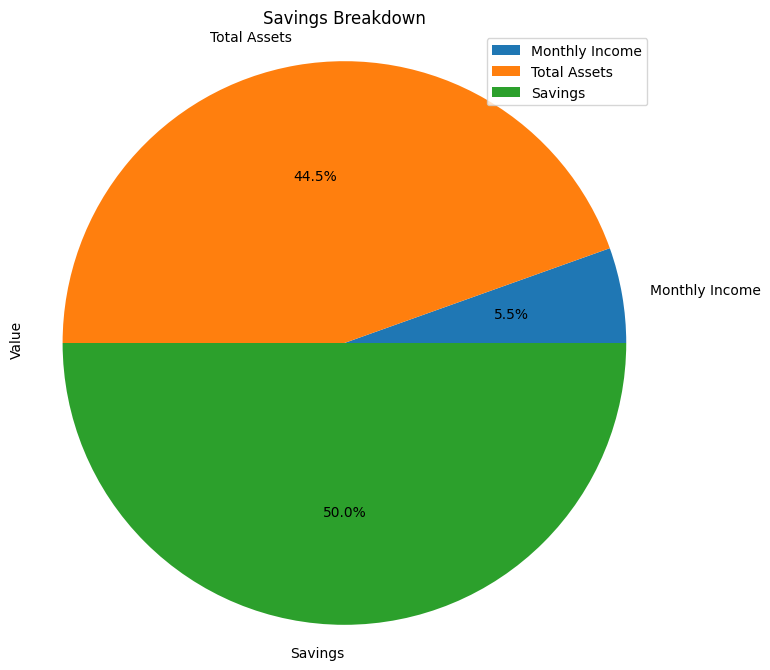

In [14]:
# Plot savings pie chart
# YOUR CODE HERE!
import pandas as pd
import matplotlib.pyplot as plt



# Plot a pie chart for the savings DataFrame
df_savings.plot.pie(y='Value', labels=df_savings['Category'], autopct='%1.1f%%', figsize=(8, 8))
plt.title('Savings Breakdown')
plt.axis('equal') 
plt.show()


In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings[df_savings['Category'] == 'Total Assets']['Value'].values[0]

# Validate saving health
# YOUR CODE HERE!
if total_savings >= emergency_fund:
    print("Congratulations! Your savings are sufficient for emergencies.")
else:
    print("You may want to consider saving more for emergencies. It's a good financial practice.")


Congratulations! Your savings are sufficient for emergencies.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ["AGG","SPY"]
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
agg = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)
spy = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([agg,spy], axis=1, keys=["AGG","SPY"])

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[0.50, 0.50],  # 50% allocation to each asset
    num_simulation=1000,
    num_trading_days=252 * 30  # Assuming 252 trading days in a year for 30 years
)

In [19]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.


,0,1,2,3,4,5,6,7,8,9
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998080,1.006822,0.998413,0.996440,1.000640,1.006403,0.998781,1.003533,0.995760,0.995214
2,1.005217,1.005579,0.997941,0.996506,0.991319,1.010475,1.000504,1.000943,0.994762,0.994233
3,0.998032,1.002725,0.997864,0.994599,0.988705,1.004907,0.999691,0.998750,0.992490,0.991989
4,0.999113,1.006864,1.002495,0.997414,0.979704,1.014340,0.999006,0.994765,0.991749,0.987989
...,...,...,...,...,...,...,...,...,...,...
7556,5.529427,7.938058,6.799890,5.920722,7.698376,27.399519,13.118381,6.350382,24.326405,8.389360
7557,5.567944,7.826451,6.781032,5.918194,7.672288,27.417352,13.127143,6.335294,24.381122,8.365964
7558,5.533974,7.796614,6.811806,5.950363,7.668485,27.240573,13.126573,6.374036,24.411262,8.391868
7559,5.516885,7.884029,6.805596,5.875267,7.705232,27.260687,13.030553,6.389529,24.306136,8.447059


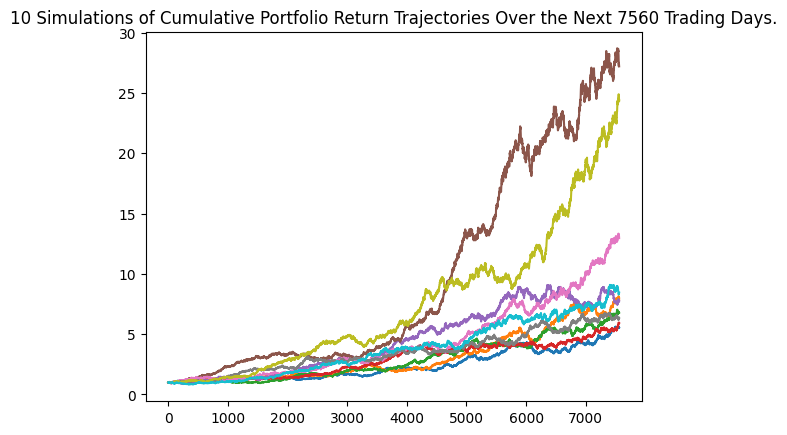

In [21]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_even_dist.plot_simulation()

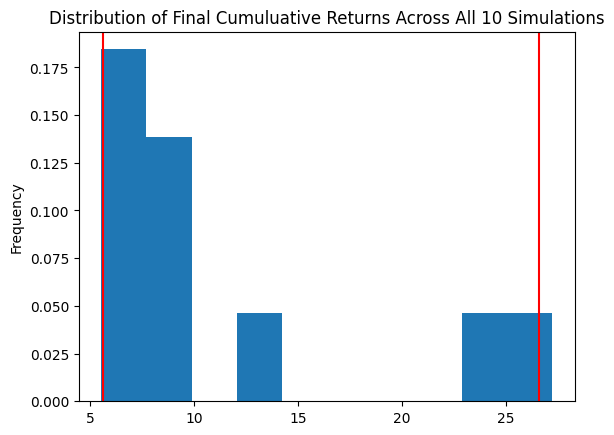

In [22]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [23]:


# Fetch summary statistics from the Monte Carlo simulation results
sum_stats = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(sum_stats)


count           10.000000
mean            11.334372
std              7.939646
min              5.531233
25%              6.469865
50%              7.854804
75%             11.837235
max             27.213954
95% CI Lower     5.613675
95% CI Upper    26.586209
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(sum_stats[8]*20000,2)
ci_upper = round(sum_stats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $112273.49 and $531724.17


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(sum_stats[8]*30000,2)
ci_upper = round(sum_stats[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $168410.24 and $797586.26


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [28]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [29]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [31]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")